# Correct Zeta function
Here I am using the correct zeta function after correcting thr kinematic mistake in my previous definition

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from non_relativistic_seperate import *
from zeta import *
from tqdm import tqdm
from scipy.optimize import root_scalar
import sys
from importlib import reload
import zeta_asymptotes

In [2]:
k = 3
a = k-1.5
Xi_sq = 10**k
alpha = 10**(-a)
print(Xi_sq)
#graph zeta for q_2 in range 0 to 10

d = np.array([0,0,0])


1000


In [ ]:
q_2 = np.linspace(0.001,20,4000)
zeta_results = np.zeros(len(q_2))

for i in tqdm(range(len(q_2))):
    zeta_results[i] = zeta(q_2[i],Xi_sq,alpha,d)



In [ ]:
asy = zeta_asymptotes.asymptotes(21, d )

In [ ]:
#plot first 10 asymptotes on top of zeta
plt.figure(figsize=(40,4))
#
plt.plot(q_2,zeta_results, label = 'zeta')
plt.ylim(-50,50)
#plot asymptotes

asy_smaller_than = asy[asy<max(q_2)]
for i in range(len(asy_smaller_than)):
    plt.axvline(asy[i], color = 'r')

plt.legend()
plt.grid()
plt.show()



In [ ]:
root = 1.5
y =  zeta(root,Xi_sq,alpha,d)

print(y)

In [ ]:
#find roots of function


root1 = root_scalar(zeta, args = (Xi_sq,alpha,d), bracket = [1.5,2]).root 

print(root1)

In [ ]:
s = 1
derivative(root1, Xi_sq, s, d)


In [ ]:
#find taylor series coefficients for zeta
s_max = 50
c_s = [derivative(root1,3e4 if s  ==1 else 1e3,s, d) for s in range(1,s_max)]

taylor = lambda x: sum([c_s[s-1]*(x-root1)**s for s in range(1,s_max)])  #+y

In [ ]:

plt.ylim(-20,20)
plt.plot(q_2, taylor(q_2))
plt.plot(q_2, zeta_results)
plt.grid()

In [ ]:
# plot the difference
plt.figure(figsize=(10,4))
plt.plot(q_2, taylor(q_2)-zeta_results)
plt.ylim(-1,1)
plt.xlim(1,2)
plt.grid()
plt.show()


# Finding Asymptotes and zeros


In [ ]:
###Main PARAMETER D
d = np.array([4,0,0])


k = 4
a = k-1.5
Xi = 10**k
alpha = 10**(-a)

In [ ]:
asymptotes = zeta_asymptotes.asymptotes(d, 5e3)

kappa_sq = np.max(asymptotes)
print("Number of Asymptotes found: ",len(asymptotes))
print("Max q_sq: ", np.round(kappa_sq))

In [ ]:
nth_root = 10
first_asymptotes = asymptotes[:(nth_root+1)]

In [ ]:
dx = 1e-11
lower_asy = first_asymptotes[:-1]
upper_asy = first_asymptotes[1:]


zeros = np.zeros_like(lower_asy)
for i in tqdm(range(len(lower_asy))):

    if (upper_asy[i]-lower_asy[i])<dx:
        zeros[i] = (lower_asy[i] + upper_asy[i])/2
    else:
        try:
            zeros[i] = root_scalar(zeta,args=(Xi, alpha, d),bracket = [lower_asy[i]+dx, upper_asy[i]-dx]).root
        except ValueError:
            print("failed at q_2 = ", lower_asy[i]+dx, upper_asy[i]-dx)
            print("values at these points: ", round(zeta(lower_asy[i]+dx, Xi, alpha_recommended(lower_asy[i], Xi, d), d)), round(zeta(upper_asy[i]-dx, Xi, alpha, d)))
            zeros[i] = (lower_asy[i] + upper_asy[i])/2

In [ ]:
print(zeros)

In [ ]:
k = 3
a = k-1.5
Xi = 10**k
alpha = 10**(-a)

q_2 = np.linspace(0.001, first_asymptotes[-1], 500)
z_d_results = np.zeros_like(q_2)
for i in tqdm(range(len(z_d_results))):
    z_d_results[i] = zeta(q_2[i], Xi, alpha, d)

z_d_plot = np.copy(z_d_results)
q_2_plot = np.copy(q_2)

In [ ]:
k = 4.3
a = k-1.5
Xi = 10**k
alpha = 10**(-a)

i = 15
print(zeros[i])

print(zeta(zeros[i], Xi, alpha, d))

In [ ]:
for i in first_asymptotes:
    q_2_plot= np.insert(q_2_plot, np.argmax(q_2_plot >= i),i)
    z_d_plot = np.insert(z_d_plot, np.argmax(q_2_plot >= i),np.nan)

plt.figure(figsize = (40,6))
plt.plot(q_2_plot, z_d_plot, label = "z_d")
#insert first asymptotes with black dotted lines, thickness 1 pt
for i in first_asymptotes:
    plt.axvline(i, linestyle = "--", color = "black", linewidth = 1, label = "Asymptotes")

#insert zeros with red dotted lines, thickness 1 pt
for i in zeros:
    plt.axvline(i, color = "red", linewidth = 1, label = "Zeros")

#label
plt.xlabel("q^2")
plt.ylabel("z_d")
plt.title("First 100 zeros of $z^d$ vs $q^2$ for $d$ = " + str(d))

plt.xlim(0,first_asymptotes[-1])

#legend
handles, labels = plt.gca().get_legend_handles_labels()
labels, ids = np.unique(labels, return_index=True)
handles = [handles[i] for i in ids]
plt.legend(handles, labels, loc='best')


plt.ylim(-50,50)
#tickmarks

#set x tickmarks, 100
max_x = first_asymptotes[-1]
steps = np.ceil(max_x/50)
plt.xticks(np.arange(0,max_x, steps))


plt.grid()


#plt.savefig("roots_zeta/"+folder_name+"/first_"+ str(len(zeros))+ "_zeros.png")
plt.show()





In [ ]:

iasy  = 1
#make an k and a meshgrid for the contour plot, a goes from 1 to 5 and k goes from 1 to 5
k = np.linspace(1,4,10)
a = np.linspace(0,5,10)
k, a = np.meshgrid(k,a)
#make alpha and Xi_sq from k and a
Xi_sqs = 10**k
alphas = 10**(-a)

zeros_mesh = np.zeros_like(k)
for i in tqdm(range(len(Xi_sqs))):
    for j in range(len(Xi_sqs[0])):
        Xi = Xi_sqs[i,j]
        alpha = alphas[i,j]
        try:
            zeros_mesh[i,j] = root_scalar(zeta,args=(Xi, alpha, d),bracket = [lower_asy[iasy]+dx, upper_asy[iasy]-dx]).root
        except ValueError:
            print("failed at q_2 = ", lower_asy[iasy]+dx, upper_asy[iasy]-dx)
            print("values at these points: ", round(zeta(lower_asy[iasy]+dx, Xi, alpha, d)), round(zeta(upper_asy[iasy]-dx, Xi, alpha, d)))
            zeros_mesh[i,j] = (lower_asy[iasy] + upper_asy[iasy])/2

#plot contour plot


In [ ]:
plt.figure(figsize = (10,6))
plt.contourf(k,a,zeros_mesh, levels = 100)
plt.colorbar()
plt.xlabel("k")
plt.ylabel("a")
plt.title("Contour plot of zeros of $z^d$ for $d$ = " + str(d))
plt.show()


In [ ]:
q_2 = np.linspace(0.001,10,1000)
Xi_sq = 1e4
a = np.linspace(0,3,10)
alpha = 10**(-a)

print(np.zeros((len(q_2),len(alpha))))

In [ ]:
import numpy as np
from scipy.optimize import fsolve

def equation(x, Xi, m, d):
    # Define the equation to solve
    gamma = np.sqrt((d**2 / (m**2 + 4*x)) + 1)
    omega_Xi = np.sqrt(Xi**2 + (1/4)*m**2)
    beta = d / np.sqrt(d**2 + m**2 + 4*x)
    return gamma * (Xi - omega_Xi * beta) - x

def solve_for_x(Xi, m, d):
    # Initial guess for x
    initial_guess = Xi
    # Solve the equation
    x_solution = fsolve(equation, initial_guess, args=(Xi, m, d))
    return x_solution[0]

# Example usage
Xi = 1000  # Replace with your value
m = 1      # Replace with your value
d = 100      # Replace with your value

x_solution = solve_for_x(Xi, m, d)
print("Solution for x:", x_solution)


# Returning to root finding algorithm

In [24]:
###Main PARAMETER D
d = np.array([1,0,0])
k = 4
a = k-1.5
Xi = 10**k
alpha = 10**(-a)

In [25]:
asymptotes = zeta_asymptotes.asymptotes(d, 5e3)

kappa_sq = np.max(asymptotes)
print("Number of Asymptotes found: ",len(asymptotes))
print("Max q_sq: ", np.round(kappa_sq))

Number of Asymptotes found:  9076
Max q_sq:  1181.0


In [26]:
nth_root = 20
first_asymptotes = asymptotes[:(nth_root+1)]

In [27]:
dx = 1e-11
lower_asy = first_asymptotes[:-1]
upper_asy = first_asymptotes[1:]


zeros = np.zeros_like(lower_asy)
for i in tqdm(range(len(lower_asy))):
    if (upper_asy[i]-lower_asy[i])<dx:
        zeros[i] = (lower_asy[i] + upper_asy[i])/2
    else:
        try:
            zeros[i] = root_scalar(zeta,args=(Xi, alpha, d),bracket = [lower_asy[i]+dx, upper_asy[i]-dx]).root
        except ValueError:
            print("failed at q_2 = ", lower_asy[i]+dx, upper_asy[i]-dx)
            print("values at these points: ", round(zeta(lower_asy[i]+dx, Xi, alpha_recommended(lower_asy[i], Xi, d), d)), round(zeta(upper_asy[i]-dx, Xi, alpha, d)))
            zeros[i] = (lower_asy[i] + upper_asy[i])/2

100%|██████████| 20/20 [01:03<00:00,  3.20s/it]


In [46]:
k = 4
a = k-1.5
Xi = 10**k
alpha = 10**(-a)
#evaluate zeta for all zeros
z_d_results = np.zeros_like(zeros)
for i in tqdm(range(len(zeros))):
    z_d_results[i] = zeta(zeros[i], Xi, alpha, d)
    

print(z_d_results)

100%|██████████| 20/20 [00:06<00:00,  3.12it/s]

[-1.58135011e-14 -3.66743674e-12 -1.86337399e-13 -7.38472006e-15
  5.86121028e-14  1.47758269e-10  2.18291090e-14  7.24806752e-15
  1.05729223e-12 -4.33960086e-14  2.70859602e-12  1.44271757e-14
  5.40625222e-13 -2.88051914e-14 -2.15843680e-14  1.60957004e-09
 -2.13069295e-11 -1.36510803e-13  7.54080011e-13  1.07671696e-12]


In [47]:
q_2 = np.linspace(0.001, first_asymptotes[-1], 1000)
z_d_results = np.zeros_like(q_2)
for i in tqdm(range(len(z_d_results))):
    z_d_results[i] = zeta(q_2[i], Xi, alpha, d)

z_d_plot = np.copy(z_d_results)
q_2_plot = np.copy(q_2)

100%|██████████| 1000/1000 [05:05<00:00,  3.27it/s]


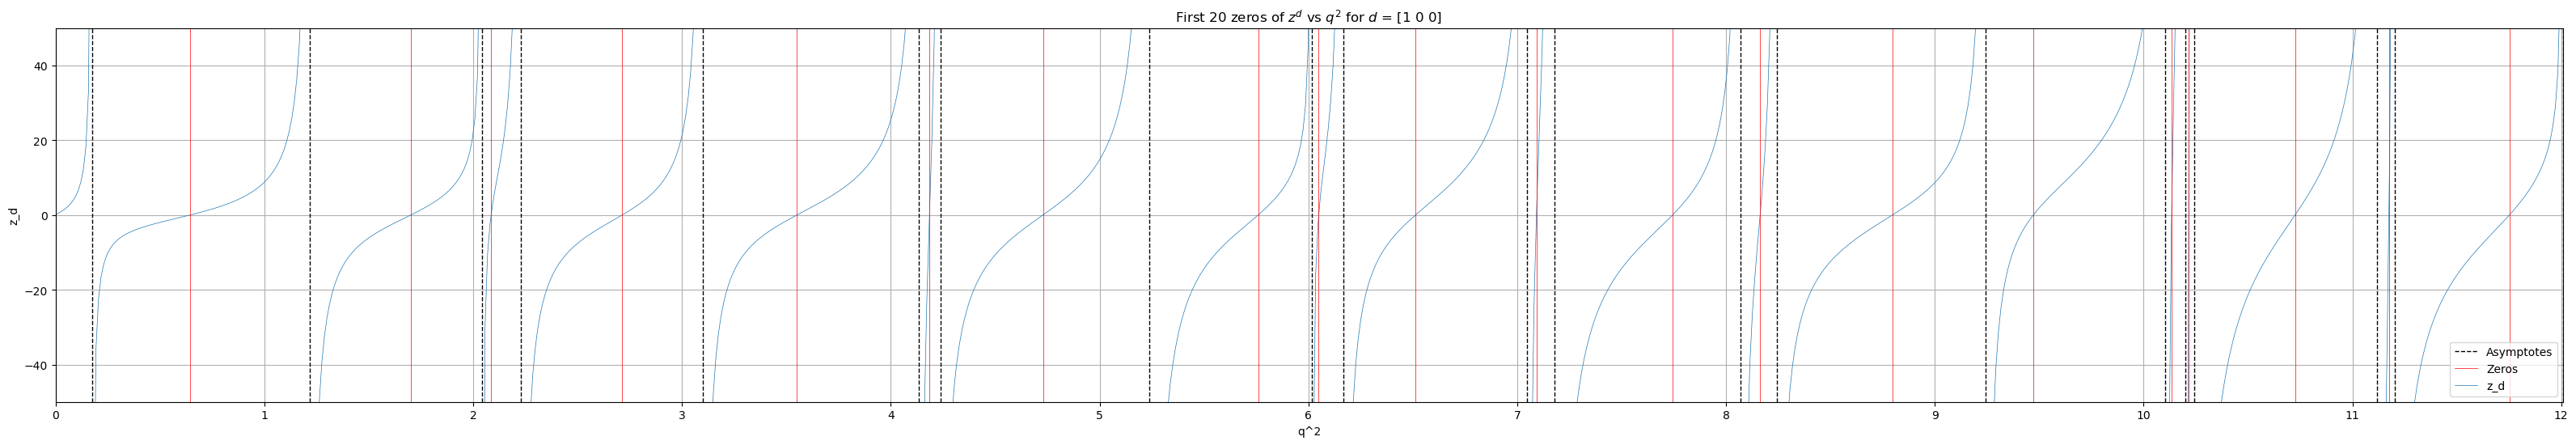

In [49]:
for i in first_asymptotes:
    q_2_plot= np.insert(q_2_plot, np.argmax(q_2_plot >= i),i)
    z_d_plot = np.insert(z_d_plot, np.argmax(q_2_plot >= i),np.nan)

plt.figure(figsize = (40,6))
plt.plot(q_2_plot, z_d_plot, label = "z_d", linewidth = 1)
#insert first asymptotes with black dotted lines, thickness 1 pt
for i in first_asymptotes:
    plt.axvline(i, linestyle = "--", color = "black", linewidth = 1, label = "Asymptotes")

#insert zeros with red dotted lines, thickness 1 pt
for i in zeros:
    plt.axvline(i, color = "red", linewidth = 1, label = "Zeros")

#label
plt.xlabel("q^2")
plt.ylabel("z_d")
plt.title("First {} zeros of $z^d$ vs $q^2$ for $d$ = {} ". format(len(zeros), d))

plt.xlim(0,first_asymptotes[-1])

#legend
handles, labels = plt.gca().get_legend_handles_labels()
labels, ids = np.unique(labels, return_index=True)
handles = [handles[i] for i in ids]
plt.legend(handles, labels, loc='best')


plt.ylim(-50,50)
#tickmarks

#set x tickmarks, 100
max_x = first_asymptotes[-1]
steps = np.ceil(max_x/50)
plt.xticks(np.arange(0,max_x, steps))


plt.grid()


#plt.savefig("roots_zeta/"+folder_name+"/first_"+ str(len(zeros))+ "_zeros.png")
plt.show()


In [1]:
from roots_finder_zeta_d import root_finding
import numpy as np

In [4]:
#d = np.array([[0,0,0], [1,1,0], [1,1,1], [2,0,0], [2,1,0], [2,1,1], [2,2,0], [2,2,1], [2,2,2], [3,0,0], [3,1,0], [3,1,1], [3,2,0], [3,2,1], [3,2,2], [3,3,0], [3,3,1], [3,3,2], [3,3,3], 
d = np.array([ [1,1,1], [2,1,0],[2,1,1], [2,2,1], [3,0,0], [3,1,0], [3,1,1], [3,2,1], [3,2,2], [3,3,1], [3,3,2], [4,0,0], [4,1,0], [4,1,1], [4,2,0], [4,2,1], [4,2,2], [4,3,0], [4,3,1], [4,3,2], [4,3,3], [4,4,0], [4,4,1], [4,4,2], [4,4,3], [4,4,4]])
for i in d:
    print(i)
    root_finding(i,4)

[1 1 1]
Number of Asymptotes found:  3457
Max q_sq:  537.0
missing_zero
Finding zeros of zeta


100%|██████████| 101/101 [06:34<00:00,  3.91s/it]


Calculating function for plotting


100%|██████████| 10000/10000 [1:43:25<00:00,  1.61it/s]    


[2 1 0]
Number of Asymptotes found:  4053
Max q_sq:  350.0
missing_zero
Finding zeros of zeta


100%|██████████| 101/101 [06:33<00:00,  3.89s/it]


Calculating function for plotting


100%|██████████| 10000/10000 [10:00<00:00, 16.66it/s]


[2 1 1]
Number of Asymptotes found:  3392
Max q_sq:  298.0
missing_zero
Finding zeros of zeta


100%|██████████| 101/101 [06:24<00:00,  3.81s/it]


Calculating function for plotting


100%|██████████| 10000/10000 [10:00<00:00, 16.64it/s]


[2 2 1]
Number of Asymptotes found:  2254
Max q_sq:  207.0
missing_zero
Finding zeros of zeta


100%|██████████| 101/101 [06:30<00:00,  3.87s/it]


Calculating function for plotting


100%|██████████| 10000/10000 [10:07<00:00, 16.45it/s]


[3 0 0]
Number of Asymptotes found:  822
Max q_sq:  207.0
Finding zeros of zeta


100%|██████████| 100/100 [06:34<00:00,  3.94s/it]


Calculating function for plotting


100%|██████████| 10000/10000 [10:01<00:00, 16.62it/s]


[3 1 0]
Number of Asymptotes found:  2034
Max q_sq:  187.0
missing_zero
Finding zeros of zeta


100%|██████████| 101/101 [06:32<00:00,  3.89s/it]


Calculating function for plotting


100%|██████████| 10000/10000 [13:48<00:00, 12.07it/s]  


[3 1 1]
Number of Asymptotes found:  1435
Max q_sq:  172.0
missing_zero
Finding zeros of zeta


100%|██████████| 101/101 [05:19<00:00,  3.16s/it]


Calculating function for plotting


100%|██████████| 10000/10000 [07:56<00:00, 20.99it/s]


[3 2 1]
Number of Asymptotes found:  1827
Max q_sq:  137.0
missing_zero
Finding zeros of zeta


100%|██████████| 101/101 [05:08<00:00,  3.05s/it]


Calculating function for plotting


100%|██████████| 10000/10000 [08:01<00:00, 20.76it/s]


[3 2 2]
Number of Asymptotes found:  1133
Max q_sq:  113.0
missing_zero
Finding zeros of zeta


100%|██████████| 101/101 [05:12<00:00,  3.09s/it]


Calculating function for plotting


100%|██████████| 10000/10000 [07:59<00:00, 20.84it/s]


[3 3 1]
Number of Asymptotes found:  812
Max q_sq:  102.0
missing_zero
Finding zeros of zeta


100%|██████████| 101/101 [05:15<00:00,  3.13s/it]


Calculating function for plotting


100%|██████████| 10000/10000 [08:00<00:00, 20.80it/s]


[3 3 2]
Number of Asymptotes found:  839
Max q_sq:  89.0
missing_zero
Finding zeros of zeta


100%|██████████| 101/101 [05:53<00:00,  3.50s/it]


Calculating function for plotting


100%|██████████| 10000/10000 [08:05<00:00, 20.60it/s]


[4 0 0]
Number of Asymptotes found:  425
Max q_sq:  120.0


/Users/ericrechberger/Library/CloudStorage/OneDrive-UniversityofEdinburgh/MPhys project/Code/zeta.py:39: RuntimeWarning: divide by zero encountered in divide
  terms = omega_r_star/omega_r*np.exp(-alpha*(r_star_sq-q_2_star))/(q_2_star-r_star_sq)


missing_zero
Finding zeros of zeta


100%|██████████| 101/101 [05:16<00:00,  3.13s/it]


Calculating function for plotting


100%|██████████| 10000/10000 [08:01<00:00, 20.76it/s]


[4 1 0]
Number of Asymptotes found:  1143
Max q_sq:  114.0
missing_zero
Finding zeros of zeta


100%|██████████| 101/101 [05:13<00:00,  3.11s/it]


Calculating function for plotting


100%|██████████| 10000/10000 [07:58<00:00, 20.88it/s]


[4 1 1]
Number of Asymptotes found:  1062
Max q_sq:  108.0
missing_zero
Finding zeros of zeta


100%|██████████| 101/101 [05:11<00:00,  3.08s/it]


Calculating function for plotting


100%|██████████| 10000/10000 [08:27<00:00, 19.72it/s]


[4 2 0]
Number of Asymptotes found:  704
Max q_sq:  97.0
missing_zero
Finding zeros of zeta


100%|██████████| 101/101 [05:14<00:00,  3.11s/it]


Calculating function for plotting


100%|██████████| 10000/10000 [07:59<00:00, 20.84it/s]


[4 2 1]
Number of Asymptotes found:  1159
Max q_sq:  93.0
missing_zero
Finding zeros of zeta


100%|██████████| 101/101 [05:12<00:00,  3.09s/it]


Calculating function for plotting


100%|██████████| 10000/10000 [1:42:54<00:00,  1.62it/s]    


[4 2 2]
Number of Asymptotes found:  584
Max q_sq:  81.0
missing_zero
Finding zeros of zeta


100%|██████████| 101/101 [06:27<00:00,  3.83s/it]


Calculating function for plotting


100%|██████████| 10000/10000 [10:04<00:00, 16.53it/s]


[4 3 0]
Number of Asymptotes found:  725
Max q_sq:  78.0
missing_zero
Finding zeros of zeta


100%|██████████| 101/101 [06:36<00:00,  3.93s/it]


Calculating function for plotting


100%|██████████| 10000/10000 [10:05<00:00, 16.52it/s]


[4 3 1]
Number of Asymptotes found:  949
Max q_sq:  75.0
missing_zero
Finding zeros of zeta


100%|██████████| 101/101 [06:30<00:00,  3.87s/it]


Calculating function for plotting


100%|██████████| 10000/10000 [10:04<00:00, 16.55it/s]


[4 3 2]
Number of Asymptotes found:  824
Max q_sq:  68.0
missing_zero
Finding zeros of zeta


100%|██████████| 101/101 [06:33<00:00,  3.90s/it]


Calculating function for plotting


100%|██████████| 10000/10000 [10:06<00:00, 16.48it/s]


[4 3 3]
Number of Asymptotes found:  497
Max q_sq:  58.0
missing_zero
Finding zeros of zeta


100%|██████████| 101/101 [06:27<00:00,  3.84s/it]


Calculating function for plotting


100%|██████████| 10000/10000 [10:02<00:00, 16.61it/s]


[4 4 0]
Number of Asymptotes found:  266
Max q_sq:  61.0
Finding zeros of zeta


100%|██████████| 100/100 [06:40<00:00,  4.01s/it]


Calculating function for plotting


100%|██████████| 10000/10000 [09:59<00:00, 16.67it/s]


[4 4 1]
Number of Asymptotes found:  520
Max q_sq:  60.0
missing_zero
Finding zeros of zeta


100%|██████████| 101/101 [06:19<00:00,  3.76s/it]


Calculating function for plotting


100%|██████████| 10000/10000 [10:04<00:00, 16.54it/s]


[4 4 2]
Number of Asymptotes found:  391
Max q_sq:  55.0
missing_zero
Finding zeros of zeta


100%|██████████| 101/101 [06:32<00:00,  3.89s/it]


Calculating function for plotting


100%|██████████| 10000/10000 [10:03:36<00:00,  3.62s/it]   


[4 4 3]
Number of Asymptotes found:  401
Max q_sq:  48.0
missing_zero
Finding zeros of zeta


100%|██████████| 101/101 [07:00<00:00,  4.16s/it]


Calculating function for plotting


100%|██████████| 10000/10000 [10:06<00:00, 16.48it/s]


[4 4 4]
Number of Asymptotes found:  120
Max q_sq:  41.0
missing_zero
Finding zeros of zeta


100%|██████████| 101/101 [06:25<00:00,  3.81s/it]


Calculating function for plotting


100%|██████████| 10000/10000 [09:58<00:00, 16.70it/s]


In [9]:
((10**(0.5))**(3/2))

5.623413251903491

In [10]:
(44*_)/60

4.123836384729227